# Problem 1.10

### (a)

Establish utilities for computing Gram-schmidt. 

In [1]:
import sympy as sp
import numpy as np
from sympy.abc import x

lowerbound = -np.pi
upperbound = np.pi

def intgrt(f, upper, lower):
    
    F = sp.lambdify(x, sp.integrate(f, x), 'numpy')
    
    return F(upper) - F(lower)

def inprod(f, g):
    return intgrt(f * g , upperbound, lowerbound)

def normf(f):
    return np.sqrt(inprod(f, f))

Computing Gram-Schmidt.

for $\left \{ v^{(0)} \ v^{(1)} \ v^{(2)} \ v^{(3)} \ v^{(4)} \ v^{(5)}\right \} = \left \{ 1 \ x \ x^{2}  \ x^{3} \ x^{4} \ x^{5} \right \}$:

general format:

$$\begin{matrix}
e^{(0)} = \frac{v^{(0)}}{\left \| v^{(0)} \right \|}\\ \\ 
\beta ^{(k)} = v^{(k)} - \left \langle v^{(k)}, e^{(k-1)} \right \rangle e^{(k-1)} - \left \langle v^{(k)}, e^{(k-2)} \right \rangle e^{(k-2)}- ... -\left \langle v^{(k)}, e^{(1)} \right \rangle e^{(1)},\ e^{(k)}=\frac{\beta^{(k)}}{\left \| \beta^{(k)} \right \|}\\
\end{matrix}$$


In [2]:
v= [x ** i for i in range(0, 6)]


# ===========================================================
# Function to compute Gram-Schmidt
# ===========================================================
def gram_schmidt(vectors):
    
    basis = []
    for vector in vectors:
        beta = vector - sum(inprod(vector, e) * e for e in basis)
        basis.append(beta / normf(beta))
    return basis


basis = gram_schmidt(v)

for i in range(len(basis)):
    print('Content of e(%d): ' %i, basis[i])

Content of e(0):  0.398942280401433
Content of e(1):  0.219948406790773*x
Content of e(2):  0.135577175410079*x**2 - 0.446031029038192
Content of e(3):  0.0851039026947903*x**3 - 0.50396511155183*x
Content of e(4):  0.0537538886225847*x**4 - 0.454739670621537*x**2 + 0.44881006545162
Content of e(5):  0.0340492544849671*x**5 - 0.373391857687381*x**3 + 0.789692126134784*x


### (b)

Since $\left \{ e^{(0)} \ e^{(1)} \ e^{(2)} \ e^{(3)} \ e^{(4)} \ e^{(5)}\right \}$ are orthogonal basis, then:

$$Proj_U(g) =\sum_{k = 0}^{5}Proj_{e^{(k)}}(g)$$ .

Where $Proj_{e^{(k)}}(g) = \frac{\left \langle g, e^{(k)} \right \rangle}{\left \| e^{(k)} \right \|}e^{(k)} = \left \langle g, e^{(k)} \right \rangle e^{(k)}$.

In [5]:
g = sp.sin(x)
proj_g = sum(inprod(g, e) * e for e in basis)
print('Projection of g onto polynomial function space U is: \n', proj_g)

Projection of g onto polynomial function space U is: 
 0.0056431179763544*x**5 - 0.155271410633512*x**3 + 0.987862135574851*x


### (c)

All the even coefficients are zero. The reason is that $\sin(x)$ is an odd function, it should not contain any even polynomial pattern in approximation decomposition.

### (d)

Plot the inner-product space approximation and Taylor approximation as follow: 

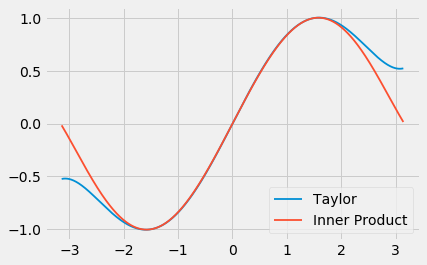

In [6]:
import matplotlib.pyplot as plt

xx = np.linspace(lowerbound, upperbound, 1000)

apprx_taylor = xx - xx ** 3 / np.math.factorial(3) + xx ** 5 / np.math.factorial(5)
apprx_inpro = sp.lambdify(x, proj_g, 'numpy')(xx)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 4))
plt.plot(xx, apprx_taylor, label='Taylor', lw=1.8)
plt.plot(xx, apprx_inpro, label='Inner Product', lw=1.8)
leg = plt.legend(loc='lower right', fontsize='medium')

As we can see, inner product approximation is apperently better than the taylor approximation. The performance of Taylor is inaccurate when $\sin(x)$ function descends, and accurate when function ascend. The difference may be that inner production make approximation to determinated polynomial function.By contrast, Taylor is infinite, while the high order infinitesimal still leverage the approximation results.